In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import yfinance as yf
from tqdm import tqdm

In [5]:
top_50 = pd.read_csv("Projekty/Projekt nr 3/top_50_volatile_with_returns.csv")
bottom_50 = pd.read_csv("Projekty/Projekt nr 3/bottom_50_volatile_with_returns_final.csv")

In [11]:
# usuwamy 20 odczytow top_50 z uwagi na błędy na stronie yahoo finance
top_50 = top_50.sort_values("annual_volatility", ascending=False).iloc[20:].reset_index(drop=True)

In [19]:
# Największy 1Y_return po usunięciu błędow yfinance
top_50.loc[top_50["1Y_return"].idxmax()]

ticker                                 EP
annual_volatility                13.07059
year                                 2009
1Y_return                        5.714286
1Y_monthly_investment_return     0.632327
price_source                    Adj Close
Name: 33, dtype: object

In [23]:
# Liczymy częstotliwość występowania tickerów
top_20_tickers = top_50['ticker'].value_counts().head(20)
bottom_20_tickers = bottom_50['ticker'].value_counts().head(20)

print("Top 20 najczęściej występujących spółek wśród najbardziej zmiennych:")
print(top_20_tickers)

print("\nTop 20 najczęściej występujących spółek wśród najmniej zmiennych:")
print(bottom_20_tickers)

Top 20 najczęściej występujących spółek wśród najbardziej zmiennych:
ticker
MU      19
FCX     18
NVDA    14
AMD     14
WDC     12
DVN     11
APA     11
WYNN    11
ATI     10
GT      10
HAL     10
BBBY    10
CF       9
PHM      9
DHI      9
NOV      9
NFLX     9
FSLR     9
URI      9
VLO      9
Name: count, dtype: int64

Top 20 najczęściej występujących spółek wśród najmniej zmiennych:
ticker
PEP    20
KO     20
PG     19
JNJ    19
ED     17
SO     17
MCD    17
CL     17
WM     16
K      16
KMB    16
WMT    16
DUK    16
GIS    15
D      15
XEL    14
AEP    13
BDX    13
VZ     13
MKC    13
Name: count, dtype: int64


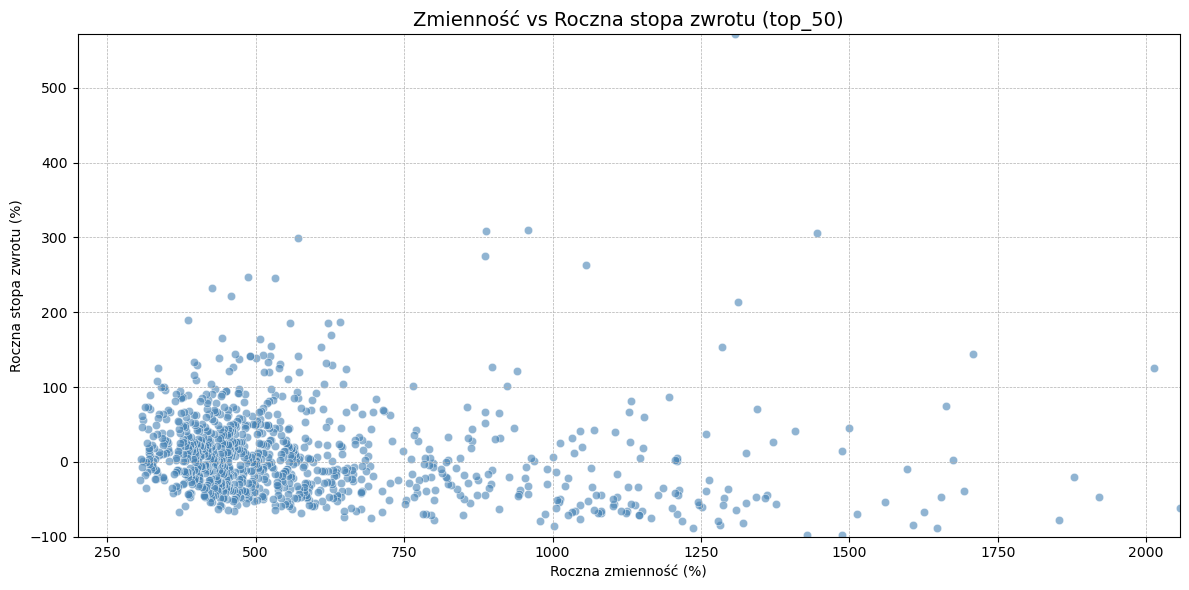

In [29]:
# Konwersja do procentów
top_50["annual_volatility_pct"] = top_50["annual_volatility"] * 100
top_50["1Y_return_pct"] = top_50["1Y_return"] * 100

# Usuwamy NaN i inf z obu kolumn
clean_df = top_50[
    top_50["annual_volatility_pct"].notna() & 
    top_50["1Y_return_pct"].notna() &
    np.isfinite(top_50["annual_volatility_pct"]) &
    np.isfinite(top_50["1Y_return_pct"])
]

# Obliczenie percentyli (100% danych) - tutaj nieistotne ale poniżej dla lepszej przejrzystości danych będzie powielane
x_low, x_high = np.percentile(clean_df["annual_volatility_pct"], [0, 100])
y_low, y_high = np.percentile(clean_df["1Y_return_pct"], [0, 100])

# Wykres
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=clean_df,
    x="annual_volatility_pct",
    y="1Y_return_pct",
    alpha=0.6,
    color='steelblue'
)

plt.xlim(200, x_high)
plt.ylim(-100, y_high)

plt.title("Zmienność vs Roczna stopa zwrotu (top_50)", fontsize=14)
plt.xlabel("Roczna zmienność (%)")
plt.ylabel("Roczna stopa zwrotu (%)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

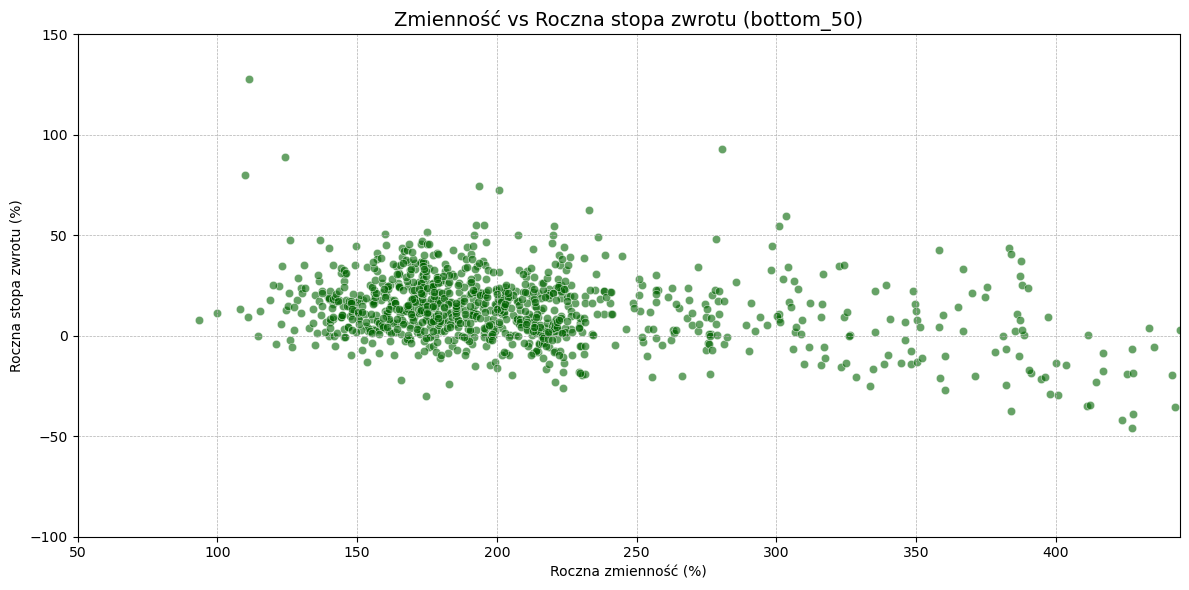

In [33]:
# Konwersja do procentów
bottom_50["annual_volatility_pct"] = bottom_50["annual_volatility"] * 100
bottom_50["1Y_return_pct"] = bottom_50["1Y_return"] * 100

# Usuwamy NaN i inf z obu kolumn
clean_bottom_df = bottom_50[
    bottom_50["annual_volatility_pct"].notna() &
    bottom_50["1Y_return_pct"].notna() &
    np.isfinite(bottom_50["annual_volatility_pct"]) &
    np.isfinite(bottom_50["1Y_return_pct"])
]

# Obliczenie percentyli (100% danych) - tutaj nieistotne ale poniżej dla lepszej przejrzystości danych będzie powielane
x_low, x_high = np.percentile(clean_bottom_df["annual_volatility_pct"], [0, 100])
y_low, y_high = np.percentile(clean_bottom_df["1Y_return_pct"], [0, 100])

# Wykres
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=clean_bottom_df,
    x="annual_volatility_pct",
    y="1Y_return_pct",
    alpha=0.6,
    color='darkgreen' 
)

plt.xlim(50, x_high)
plt.ylim(-100, 150)

plt.title("Zmienność vs Roczna stopa zwrotu (bottom_50)", fontsize=14)
plt.xlabel("Roczna zmienność (%)")
plt.ylabel("Roczna stopa zwrotu (%)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

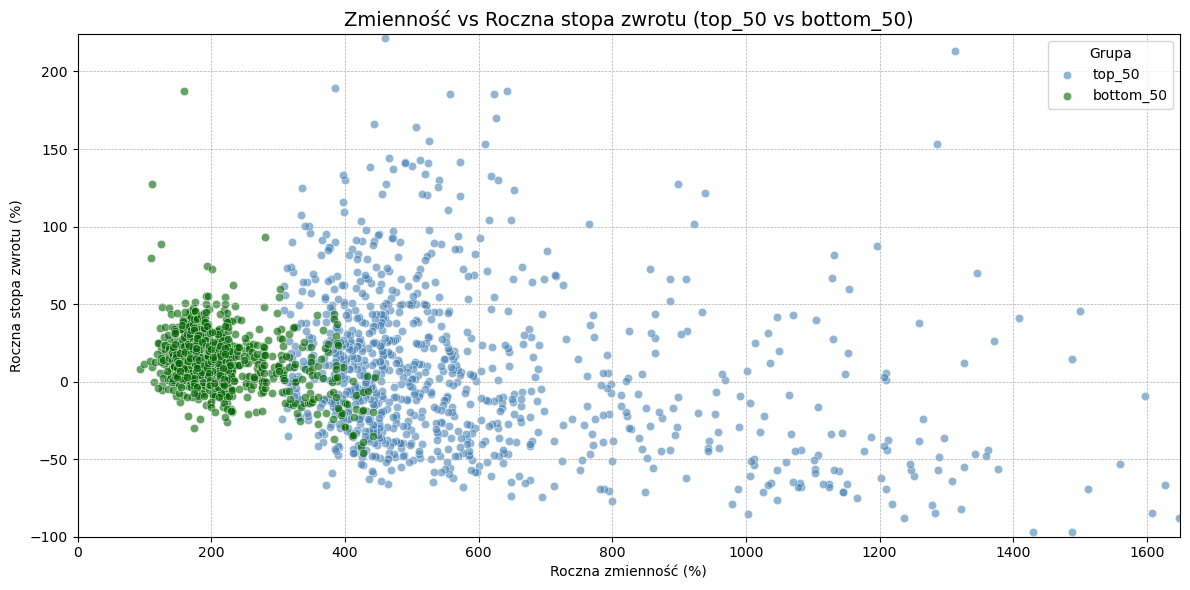

In [35]:
# Konwersja do procentów
top_50["annual_volatility_pct"] = top_50["annual_volatility"] * 100
top_50["1Y_return_pct"] = top_50["1Y_return"] * 100
bottom_50["annual_volatility_pct"] = bottom_50["annual_volatility"] * 100
bottom_50["1Y_return_pct"] = bottom_50["1Y_return"] * 100

# Czyszczenie danych
clean_top = top_50[
    top_50["annual_volatility_pct"].notna() & 
    top_50["1Y_return_pct"].notna() &
    np.isfinite(top_50["annual_volatility_pct"]) &
    np.isfinite(top_50["1Y_return_pct"])
]

clean_bottom = bottom_50[
    bottom_50["annual_volatility_pct"].notna() &
    bottom_50["1Y_return_pct"].notna() &
    np.isfinite(bottom_50["annual_volatility_pct"]) &
    np.isfinite(bottom_50["1Y_return_pct"])
]

# Obliczenie percentyli tylko na podstawie top_50
x_low, x_high = np.percentile(clean_top["annual_volatility_pct"], [0, 99])
y_low, y_high = np.percentile(clean_top["1Y_return_pct"], [0, 99])

# Wykres
plt.figure(figsize=(12, 6))

# Wykres top_50
sns.scatterplot(
    data=clean_top,
    x="annual_volatility_pct",
    y="1Y_return_pct",
    alpha=0.6,
    color='steelblue',
    label='top_50'
)

# Wykres bottom_50
sns.scatterplot(
    data=clean_bottom,
    x="annual_volatility_pct",
    y="1Y_return_pct",
    alpha=0.6,
    color='darkgreen',
    label='bottom_50'
)

# Zakresy osi
plt.xlim(0, x_high)
plt.ylim(-100, y_high)

# Etykiety
plt.title("Zmienność vs Roczna stopa zwrotu (top_50 vs bottom_50)", fontsize=14)
plt.xlabel("Roczna zmienność (%)")
plt.ylabel("Roczna stopa zwrotu (%)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend(title="Grupa")
plt.tight_layout()
plt.show()

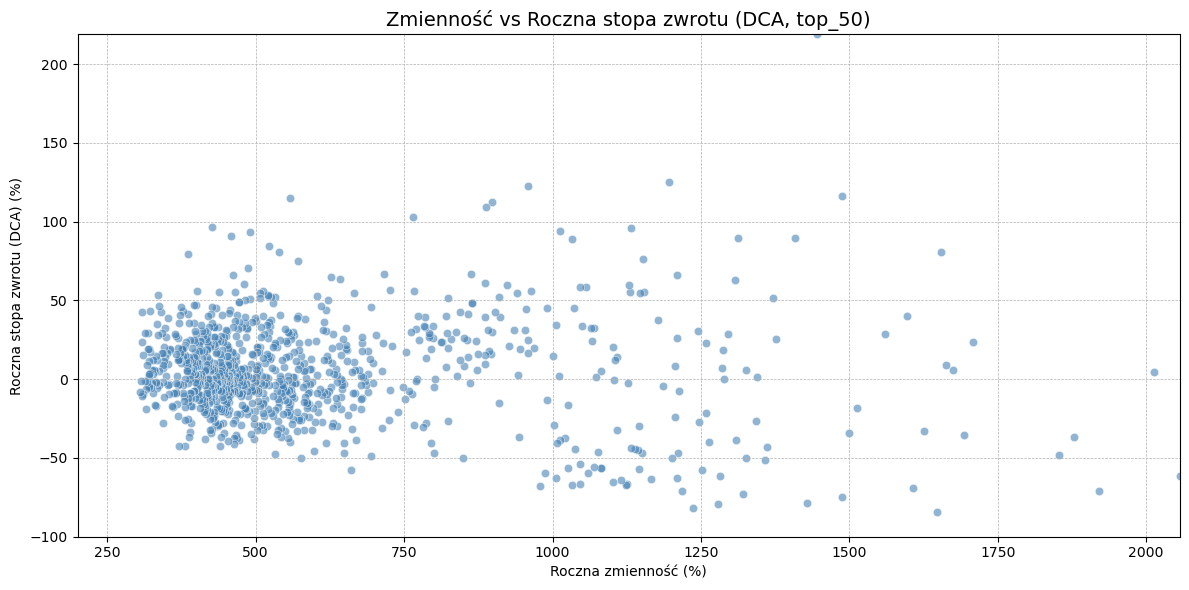

In [37]:
top_50["1Y_dca_return_pct"] = top_50["1Y_monthly_investment_return"] * 100

# Czyszczenie danych
clean_dca_df = top_50[
    top_50["annual_volatility_pct"].notna() & 
    top_50["1Y_dca_return_pct"].notna() &
    np.isfinite(top_50["annual_volatility_pct"]) &
    np.isfinite(top_50["1Y_dca_return_pct"])
]

# Obliczenie percentyli (0–100%) dla obu osi
x_low, x_high = np.percentile(clean_dca_df["annual_volatility_pct"], [0, 100])
y_low, y_high = np.percentile(clean_dca_df["1Y_dca_return_pct"], [0, 100])

# Wykres
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=clean_dca_df,
    x="annual_volatility_pct",
    y="1Y_dca_return_pct",
    alpha=0.6,
    color='steelblue'
)

plt.xlim(200, x_high)
plt.ylim(-100, y_high)

plt.title("Zmienność vs Roczna stopa zwrotu (DCA, top_50)", fontsize=14)
plt.xlabel("Roczna zmienność (%)")
plt.ylabel("Roczna stopa zwrotu (DCA) (%)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

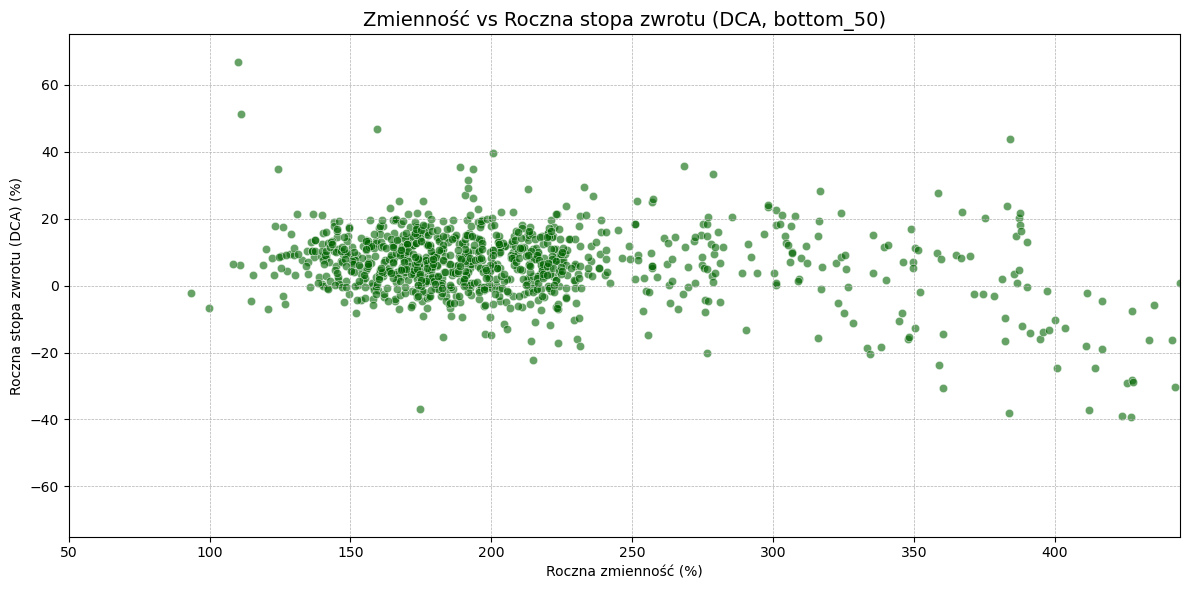

In [39]:
# Konwersja do procentów
bottom_50["1Y_dca_return_pct"] = bottom_50["1Y_monthly_investment_return"] * 100

# Czyszczenie danych
clean_bottom_dca_df = bottom_50[
    bottom_50["annual_volatility_pct"].notna() &
    bottom_50["1Y_dca_return_pct"].notna() &
    np.isfinite(bottom_50["annual_volatility_pct"]) &
    np.isfinite(bottom_50["1Y_dca_return_pct"])
]

# Obliczenie percentyli
x_low, x_high = np.percentile(clean_bottom_dca_df["annual_volatility_pct"], [0, 100])
y_low, y_high = np.percentile(clean_bottom_dca_df["1Y_dca_return_pct"], [0, 100])

# Wykres
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=clean_bottom_dca_df,
    x="annual_volatility_pct",
    y="1Y_dca_return_pct",
    alpha=0.6,
    color='darkgreen'
)

plt.xlim(50, x_high)
plt.ylim(-75, 75)

plt.title("Zmienność vs Roczna stopa zwrotu (DCA, bottom_50)", fontsize=14)
plt.xlabel("Roczna zmienność (%)")
plt.ylabel("Roczna stopa zwrotu (DCA) (%)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

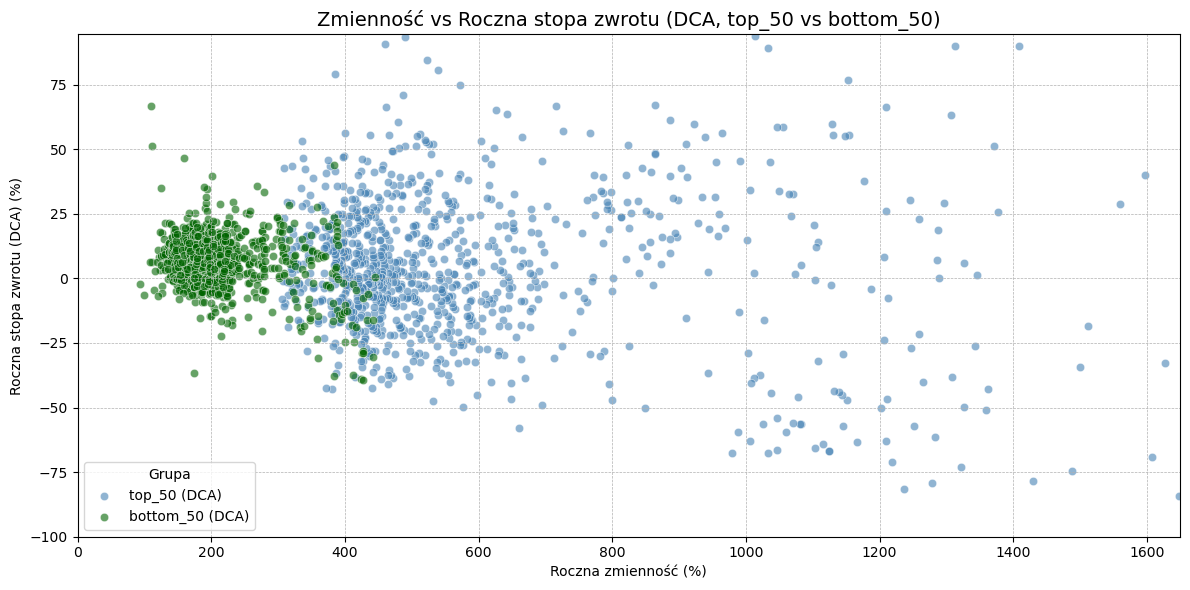

In [41]:
clean_top_dca = top_50[
    top_50["annual_volatility_pct"].notna() & 
    top_50["1Y_dca_return_pct"].notna() &
    np.isfinite(top_50["annual_volatility_pct"]) &
    np.isfinite(top_50["1Y_dca_return_pct"])
]

clean_bottom_dca = bottom_50[
    bottom_50["annual_volatility_pct"].notna() &
    bottom_50["1Y_dca_return_pct"].notna() &
    np.isfinite(bottom_50["annual_volatility_pct"]) &
    np.isfinite(bottom_50["1Y_dca_return_pct"])
]

# Obliczenie percentyli tylko na podstawie top_50 (jak w Twoim kodzie)
x_low, x_high = np.percentile(clean_top_dca["annual_volatility_pct"], [0, 99])
y_low, y_high = np.percentile(clean_top_dca["1Y_dca_return_pct"], [0, 99])

# Wykres
plt.figure(figsize=(12, 6))

# top_50 – DCA
sns.scatterplot(
    data=clean_top_dca,
    x="annual_volatility_pct",
    y="1Y_dca_return_pct",
    alpha=0.6,
    color='steelblue',
    label='top_50 (DCA)'
)

# bottom_50 – DCA
sns.scatterplot(
    data=clean_bottom_dca,
    x="annual_volatility_pct",
    y="1Y_dca_return_pct",
    alpha=0.6,
    color='darkgreen',
    label='bottom_50 (DCA)'
)

# Zakresy
plt.xlim(0, x_high)
plt.ylim(-100, y_high)

# Opis
plt.title("Zmienność vs Roczna stopa zwrotu (DCA, top_50 vs bottom_50)", fontsize=14)
plt.xlabel("Roczna zmienność (%)")
plt.ylabel("Roczna stopa zwrotu (DCA) (%)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend(title="Grupa")
plt.tight_layout()
plt.show()

In [43]:
top_50.describe()

,annual_volatility,year,1Y_return,1Y_monthly_investment_return,annual_volatility_pct,1Y_return_pct,1Y_dca_return_pct
count,980.000000,980.000000,978.000000,978.000000,980.000000,978.000000,978.000000
mean,5.999316,2014.637755,0.094804,0.045565,599.931601,9.480351,4.556538
std,2.844498,5.740240,0.597535,0.305534,284.449768,59.753483,30.553422
min,3.051997,2005.000000,-0.971731,-0.842672,305.199734,-97.173100,-84.267200
25%,4.219254,2010.000000,-0.309083,-0.124676,421.925390,-30.908300,-12.467550
50%,4.971484,2015.000000,0.009154,0.022619,497.148447,0.915400,2.261900
75%,6.514746,2020.000000,0.355754,0.214730,651.474600,35.575350,21.473050
max,20.568680,2024.000000,5.714286,2.189787,2056.868000,571.428600,218.978700


In [45]:
# spółka o najwyższym zwrocie rocznym
top_50.loc[top_50["1Y_return"].idxmax()]

ticker                                   EP
annual_volatility                  13.07059
year                                   2009
1Y_return                          5.714286
1Y_monthly_investment_return       0.632327
price_source                      Adj Close
annual_volatility_pct           1307.059019
1Y_return_pct                      571.4286
1Y_dca_return_pct                   63.2327
Name: 33, dtype: object

In [47]:
# spółka o najwyższym zwrocie DCA
top_50.loc[top_50["1Y_monthly_investment_return"].idxmax()]

ticker                                  GNW
annual_volatility                 14.455569
year                                   2009
1Y_return                          3.059441
1Y_monthly_investment_return       2.189787
price_source                      Adj Close
annual_volatility_pct           1445.556888
1Y_return_pct                      305.9441
1Y_dca_return_pct                  218.9787
Name: 19, dtype: object

In [49]:
# spółka o najwyższej zmienności
top_50.loc[top_50["annual_volatility"].idxmax()]

ticker                                 EP
annual_volatility                20.56868
year                                 2010
1Y_return                       -0.611111
1Y_monthly_investment_return    -0.613374
price_source                    Adj Close
annual_volatility_pct            2056.868
1Y_return_pct                    -61.1111
1Y_dca_return_pct                -61.3374
Name: 0, dtype: object

In [51]:
# Liczba dodatnich odczytów
positive_1Y_return = (top_50["1Y_return"] > 0).sum()
positive_1Y_dca_return = (top_50["1Y_monthly_investment_return"] > 0).sum()

print(f"Liczba dodatnich 1Y_return: {positive_1Y_return}")
print(f"Liczba dodatnich 1Y_monthly_investment_return: {positive_1Y_dca_return}")

Liczba dodatnich 1Y_return: 498
Liczba dodatnich 1Y_monthly_investment_return: 532


In [53]:
bottom_50.describe()

,annual_volatility,year,1Y_return,1Y_monthly_investment_return,annual_volatility_pct,1Y_return_pct,1Y_dca_return_pct
count,1000.000000,1000.000000,997.000000,997.000000,1000.000000,997.000000,997.000000
mean,2.096389,2014.500000,0.132928,0.064337,209.638940,13.292784,6.433690
std,0.647378,5.769167,0.177071,0.101926,64.737753,17.707068,10.192606
min,0.934758,2005.000000,-0.459242,-0.392344,93.475807,-45.924200,-39.234400
25%,1.691481,2009.750000,0.028830,0.012749,169.148144,2.883000,1.274900
50%,1.925866,2014.500000,0.126735,0.068933,192.586624,12.673500,6.893300
75%,2.236309,2019.250000,0.224439,0.124273,223.630884,22.443900,12.427300
max,4.443469,2024.000000,1.871622,0.666667,444.346882,187.162200,66.666700


In [55]:
# spółka o najniższej zmienności
bottom_50.loc[bottom_50["annual_volatility"].idxmin()]

ticker                                CVG
annual_volatility                0.934758
year                                 2006
1Y_return                         0.08018
1Y_monthly_investment_return    -0.021844
price_source                    Adj Close
annual_volatility_pct           93.475807
1Y_return_pct                       8.018
1Y_dca_return_pct                 -2.1844
Name: 50, dtype: object

In [57]:
# Wczytanie danych S&P 500
sap500 = pd.read_csv("sap500.csv", parse_dates=["Date"])

# Dodanie kolumny z rokiem
sap500["Year"] = sap500["Date"].dt.year

# Filtrowanie lat 2005–2024
sap500 = sap500[(sap500["Year"] >= 2005) & (sap500["Year"] <= 2024)]

# Grupowanie i wyliczanie rocznej stopy zwrotu
sp500_returns = (
    sap500.sort_values("Date")
    .groupby("Year")
    .agg(
        year_open=("Close", "first"),
        year_close=("Close", "last")
    )
)
sp500_returns["sp500_return"] = (sp500_returns["year_close"] / sp500_returns["year_open"]) - 1
sp500_returns = sp500_returns[["sp500_return"]].reset_index()

# Obliczenie median rocznych stóp zwrotu
top_medians = top_50.groupby("year")["1Y_return"].median().reset_index()
top_medians.rename(columns={"1Y_return": "median_top_50_return"}, inplace=True)

bottom_medians = bottom_50.groupby("year")["1Y_return"].median().reset_index()
bottom_medians.rename(columns={"1Y_return": "median_bottom_50_return"}, inplace=True)

# Połączenie wszystkich danych
merged = sp500_returns.merge(top_medians, left_on="Year", right_on="year", how="left")
merged = merged.merge(bottom_medians, left_on="Year", right_on="year", how="left")

# Wybieramy odpowiednie kolumny
final_table = merged[["Year", "sp500_return", "median_top_50_return", "median_bottom_50_return"]].copy()
final_table = final_table.sort_values("Year")

# Konwersja tylko kolumn z wartościami na procenty
cols_to_convert = ["sp500_return", "median_top_50_return", "median_bottom_50_return"]
final_table[cols_to_convert] = final_table[cols_to_convert] * 100
final_table[cols_to_convert] = final_table[cols_to_convert].round(2)

# Wyświetlenie tabeli
print(final_table)

    Year  sp500_return  median_top_50_return  median_bottom_50_return
0   2005          3.84                 26.49                     4.01
1   2006         11.78                 -5.39                    17.25
2   2007          3.65                -33.64                     5.06
3   2008        -37.58                -65.60                   -14.45
4   2009         19.67                 31.08                    16.02
5   2010         11.00                 22.45                    10.75
6   2011         -1.12                -24.88                    18.21
7   2012         11.68                 15.41                     9.17
8   2013         26.39                 36.59                    22.42
9   2014         12.39                  4.98                    18.65
10  2015         -0.69                -27.88                    10.68
11  2016         11.24                 16.10                    18.61
12  2017         18.42                 -4.18                    17.66
13  2018         -7.

In [59]:
# średnia stopa zwrotu s&p w badanym okresie
final_table['sp500_return'].mean()

9.262

In [61]:
final_table.describe()

,Year,sp500_return,median_top_50_return,median_bottom_50_return
count,20.00000,20.000000,20.000000,20.000000
mean,2014.50000,9.262000,-1.268000,12.295000
std,5.91608,16.775841,28.700773,9.371636
min,2005.00000,-37.580000,-65.600000,-14.450000
25%,2009.75000,2.565000,-24.130000,5.675000
50%,2014.50000,11.730000,0.400000,13.385000
75%,2019.25000,20.755000,20.657500,18.310000
max,2024.00000,28.790000,41.070000,29.030000


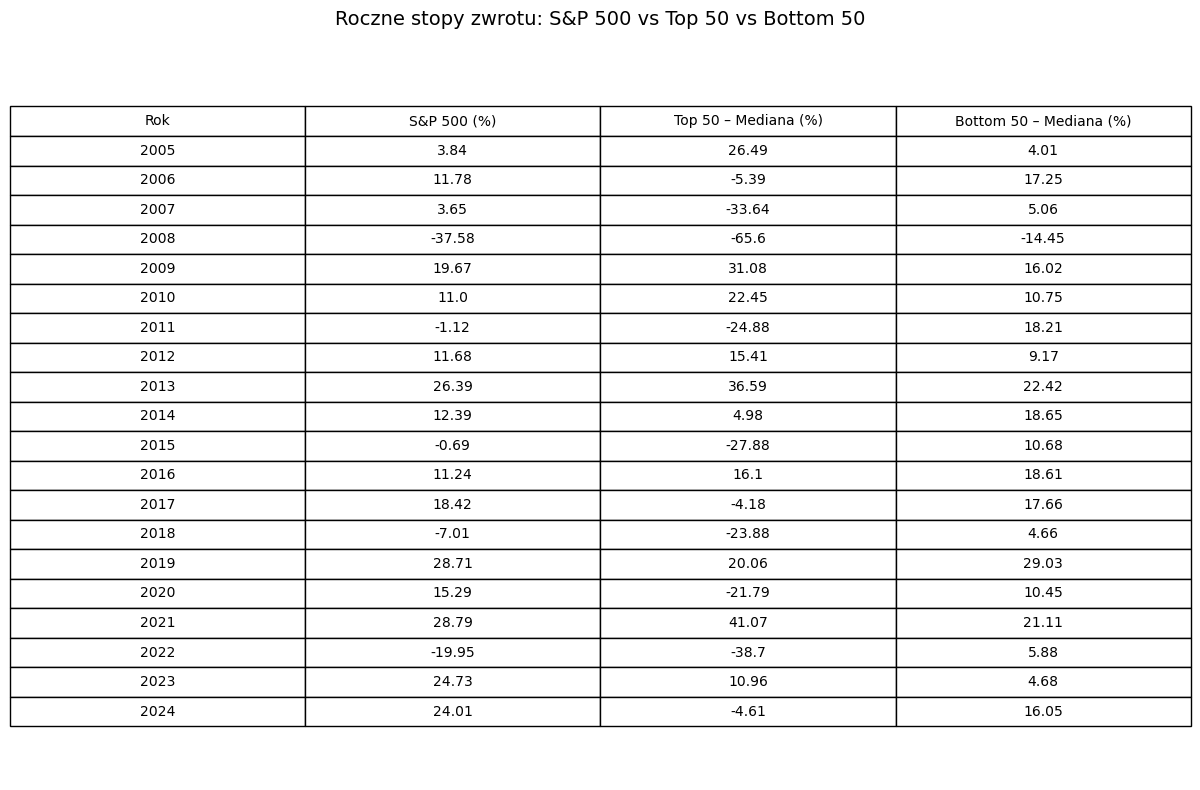

In [63]:
# Zmieniamy nagłówki kolumn na czytelniejsze
display_table = final_table.rename(columns={
    "Year": "Rok",
    "sp500_return": "S&P 500 (%)",
    "median_top_50_return": "Top 50 – Mediana (%)",
    "median_bottom_50_return": "Bottom 50 – Mediana (%)"
})

# Konwertujemy wszystkie dane na string, żeby zachować format np. "2021" zamiast "2021.0"
display_table = display_table.astype(str)

# Tworzymy tabelę jako grafikę
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')  # Ukrycie osi
ax.axis('tight')

# Generowanie tabeli
table = ax.table(
    cellText=display_table.values,
    colLabels=display_table.columns,
    cellLoc='center',
    loc='center',
)

# Stylowanie tabeli
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.title("Roczne stopy zwrotu: S&P 500 vs Top 50 vs Bottom 50", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

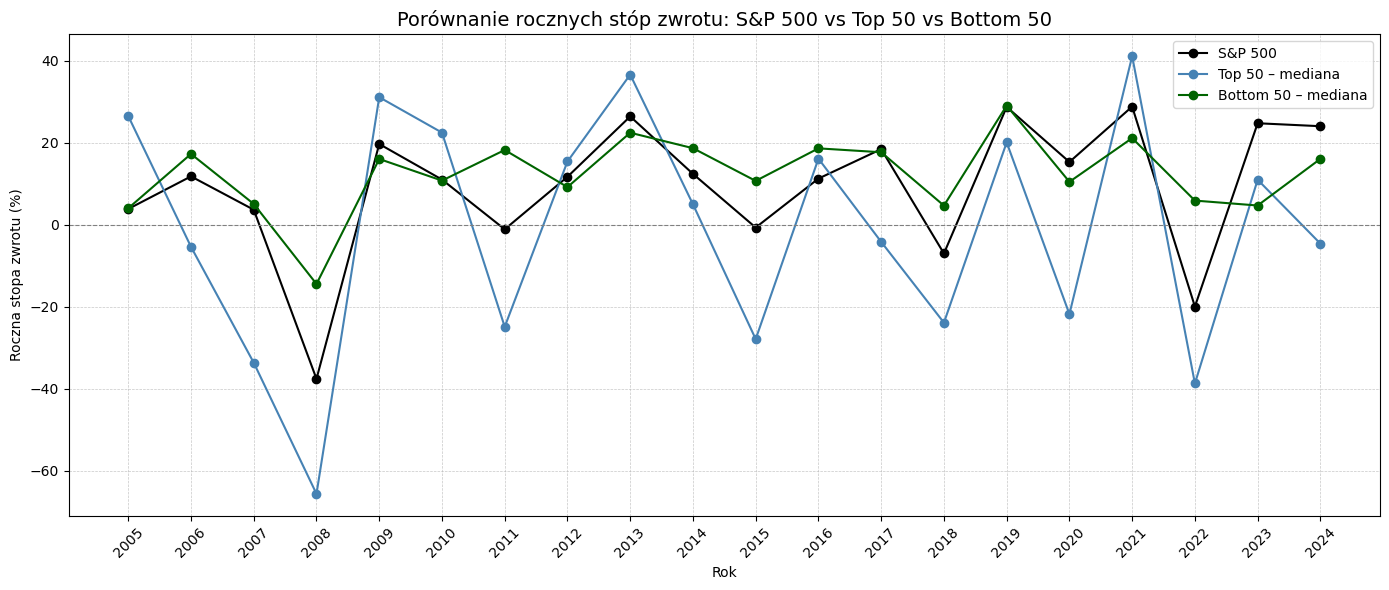

In [65]:
plt.figure(figsize=(14, 6))

plt.plot(final_table["Year"], final_table["sp500_return"], marker='o', linestyle='-', label="S&P 500", color="black")
plt.plot(final_table["Year"], final_table["median_top_50_return"], marker='o', linestyle='-', label="Top 50 – mediana", color="steelblue")
plt.plot(final_table["Year"], final_table["median_bottom_50_return"], marker='o', linestyle='-', label="Bottom 50 – mediana", color="darkgreen")

# Linia zera jako punkt odniesienia
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Oś X: lata jako etykiety
plt.xticks(
    ticks=final_table["Year"],          # jawnie ustawiamy ticki (pełne lata)
    labels=final_table["Year"],         # i ich etykiety
    rotation=45                         # rotacja dla lepszej czytelności
)

# Opis osi i tytuł
plt.title("Porównanie rocznych stóp zwrotu: S&P 500 vs Top 50 vs Bottom 50", fontsize=14)
plt.xlabel("Rok")
plt.ylabel("Roczna stopa zwrotu (%)")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

In [69]:
# Filtrowanie danych z ostatnich 10 lat
top_50_last_10_years_df = top_50[top_50["year"].between(2015, 2024)]

# Liczenie liczby wystąpień każdego tickera
ticker_counts = top_50_last_10_years_df["ticker"].value_counts().reset_index()
ticker_counts.columns = ["ticker", "count"]

# Gotowa tabela
top_50_last_10_years = ticker_counts

top_50_last_10_years.head(20)

,ticker,count
0,APA,10
1,FCX,10
2,MU,9
3,URI,9
4,NVDA,8
5,MOS,8
6,DVN,8
7,WDC,8
8,WYNN,7
9,UAL,7


In [71]:
# Filtrowanie danych bottom_50 z ostatnich 10 lat
bottom_50_last_10_years_df = bottom_50[bottom_50["year"].between(2015, 2024)]

# Liczenie liczby wystąpień każdego tickera
ticker_counts_bottom = bottom_50_last_10_years_df["ticker"].value_counts().reset_index()
ticker_counts_bottom.columns = ["ticker", "count"]

# Gotowa tabela
bottom_50_last_10_years = ticker_counts_bottom

# Podgląd
bottom_50_last_10_years.head(20)

,ticker,count
0,KO,10
1,PEP,10
2,WM,10
3,RSG,10
4,MMC,9
5,PG,9
6,MCD,9
7,JNJ,9
8,WMT,8
9,DUK,8


In [75]:
# 20 najbardziej zmiennych spółek w ostatnich 10 latach i ilość wystąpień w top 50 najbardziej zmiennych rok do roku
top_20_last_10_years = top_50_last_10_years.sort_values(by="count", ascending=False).head(20).reset_index(drop=True)
top_20_last_10_years

,ticker,count
0,APA,10
1,FCX,10
2,MU,9
3,URI,9
4,NVDA,8
5,MOS,8
6,DVN,8
7,WDC,8
8,WYNN,7
9,UAL,7


In [79]:
# 20 najmniej zmiennych spółek w ostatnich 10 latach i ilość wystąpień w top 50 najmniej zmiennych rok do roku
bottom_20_last_10_years = bottom_50_last_10_years.sort_values(by="count", ascending=False).head(20).reset_index(drop=True)

bottom_20_last_10_years

,ticker,count
0,KO,10
1,WM,10
2,RSG,10
3,PEP,10
4,MMC,9
5,PG,9
6,MCD,9
7,JNJ,9
8,CMS,8
9,ED,8


In [83]:
# stopy zwrotu po 2, 3, 5 i 10 latach najbardziej zmiennych spółek
# Ustawiamy datę końcową
returns_summary = []
end_date = datetime(2024, 12, 31)

for ticker in tqdm(top_20_last_10_years["ticker"]):
    try:
        data = yf.download(
            ticker,
            start="2014-01-01",
            end=end_date.strftime("%Y-%m-%d"),
            auto_adjust=True,
            progress=False
        )["Close"]

        if data.empty:
            continue

        result = {"ticker": ticker}
        end_price = float(data.iloc[-1])  # Cena na koniec 2024

        for years in [2, 3, 5, 10]:
            start_year = end_date.year - years
            start_date = datetime(start_year, 12, 31)

            # Znajdujemy pierwszy dostępny dzień >= start_date
            start_data = data[data.index >= pd.Timestamp(start_date)]

            if not start_data.empty:
                start_price = float(start_data.iloc[0])
                return_pct = ((end_price / start_price) - 1) * 100
                result[f"return_{years}Y"] = round(return_pct, 2)
            else:
                result[f"return_{years}Y"] = None

        returns_summary.append(result)

    except Exception as e:
        print(f"Błąd dla {ticker}: {e}")

# Tworzymy DataFrame z wynikami
returns_df = pd.DataFrame(returns_summary)
returns_df = returns_df[["ticker", "return_2Y", "return_3Y", "return_5Y", "return_10Y"]]
returns_df.reset_index(drop=True, inplace=True)

# Wyświetlenie tabeli
returns_df

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\lukas\AppData\Local\Temp\ipykernel_30592\3445888199.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_price = float(data.iloc[-1])  # Cena na koniec 2024
C:\Users\lukas\AppData\Local\Temp\ipykernel_30592\3445888199.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_price = float(start_data.iloc[0])
C:\Users\lukas\AppData\Local\Temp\ipykernel_30592\3445888199.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_price = float(data.iloc[-1])  # Cena na koniec 2024
C:\Users\lukas\AppData\Local\Temp\ipykernel_30592\3445888199.py:30: FutureWarning: Calling

,ticker,return_2Y,return_3Y,return_5Y,return_10Y
0,APA,-45.52,-10.18,-3.55,-55.68
1,FCX,3.42,-4.38,207.24,82.78
2,MU,71.27,-6.67,62.05,148.93
3,URI,102.54,117.43,333.22,608.25
4,NVDA,861.16,368.26,2247.07,28470.93
5,MOS,-40.49,-34.78,20.82,-36.53
6,DVN,-39.56,-13.84,64.84,-25.37
7,WDC,89.81,-8.57,-4.08,-35.88
8,WYNN,2.15,2.84,-36.50,-33.39
9,UAL,163.93,124.33,11.49,46.82


In [85]:
# stopy zwrotu po 2, 3, 5 i 10 latach najmniej zmiennych spółek
# Data końcowa analizy
end_date = datetime(2024, 12, 31)

# Lista wyników
bottom_returns_summary = []

# Iteracja po tickerach
for ticker in tqdm(bottom_20_last_10_years["ticker"]):
    try:
        data = yf.download(
            ticker,
            start="2014-01-01",  # Żeby uwzględnić pełne 10 lat
            end=end_date.strftime("%Y-%m-%d"),
            auto_adjust=True,
            progress=False
        )["Close"]

        if data.empty:
            continue

        result = {"ticker": ticker}
        end_price = float(data.iloc[-1])  # Cena na koniec 2024

        for years in [2, 3, 5, 10]:
            start_year = end_date.year - years
            start_date = datetime(start_year, 12, 31)

            # Szukamy pierwszego dostępnego dnia >= start_date
            start_data = data[data.index >= pd.Timestamp(start_date)]

            if not start_data.empty:
                start_price = float(start_data.iloc[0])
                return_pct = ((end_price / start_price) - 1) * 100
                result[f"return_{years}Y"] = round(return_pct, 2)
            else:
                result[f"return_{years}Y"] = None

        bottom_returns_summary.append(result)

    except Exception as e:
        print(f"Błąd dla {ticker}: {e}")

# Tworzymy DataFrame wynikowy
bottom_returns_df = pd.DataFrame(bottom_returns_summary)
bottom_returns_df = bottom_returns_df[["ticker", "return_2Y", "return_3Y", "return_5Y", "return_10Y"]]
bottom_returns_df.reset_index(drop=True, inplace=True)

# Wyświetlenie
bottom_returns_df

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\lukas\AppData\Local\Temp\ipykernel_30592\1139157201.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_price = float(data.iloc[-1])  # Cena na koniec 2024
C:\Users\lukas\AppData\Local\Temp\ipykernel_30592\1139157201.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_price = float(start_data.iloc[0])
  5%|████▏                                                                              | 1/20 [00:00<00:11,  1.62it/s]C:\Users\lukas\AppData\Local\Temp\ipykernel_30592\1139157201.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_price = float(data.iloc

,ticker,return_2Y,return_3Y,return_5Y,return_10Y
0,KO,4.75,14.66,30.86,101.92
1,WM,32.98,27.13,92.83,381.78
2,RSG,59.89,49.67,141.04,500.10
3,PEP,-10.22,-4.79,28.17,114.64
4,MMC,31.45,27.30,105.16,340.96
5,PG,15.85,10.01,51.35,142.98
6,MCD,14.76,15.69,64.54,298.57
7,JNJ,-14.49,-8.59,12.89,80.64
8,CMS,11.68,12.59,23.14,158.74
9,ED,-0.14,16.03,18.43,94.96


In [87]:
returns_df.describe()

,return_2Y,return_3Y,return_5Y,return_10Y
count,20.000000,20.000000,20.00000,20.000000
mean,82.506000,37.336500,174.44700,1775.388500
std,193.711931,127.322031,498.67685,6364.049198
min,-45.520000,-68.570000,-61.99000,-82.110000
25%,-6.292500,-14.437500,-9.55250,-36.042500
50%,54.785000,-5.525000,63.44500,64.800000
75%,90.170000,11.640000,163.61500,354.180000
max,861.160000,395.270000,2247.07000,28470.930000


In [89]:
bottom_returns_df.describe()

,return_2Y,return_3Y,return_5Y,return_10Y
count,20.000000,20.00000,20.000000,20.000000
mean,19.878000,24.20200,57.087500,179.607500
std,26.223815,30.23926,45.616815,131.123226
min,-14.490000,-21.21000,-19.370000,6.820000
25%,1.847500,7.98500,22.515000,92.262500
50%,15.305000,15.82000,48.495000,128.810000
75%,30.190000,38.18500,92.987500,289.487500
max,94.400000,95.97000,146.440000,500.100000


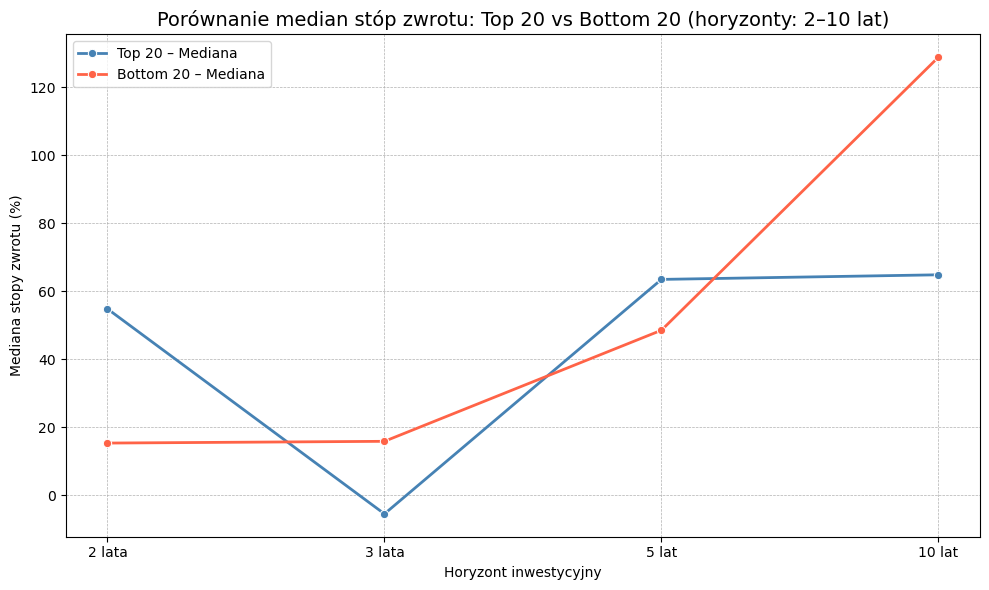

In [91]:
# Dodajemy kolumnę 'group' dla rozróżnienia
returns_df["group"] = "Top 20"
bottom_returns_df["group"] = "Bottom 20"

# Łączymy dane
combined_df = pd.concat([returns_df, bottom_returns_df], ignore_index=True)

# Obliczamy mediany dla każdej grupy
median_returns = combined_df.groupby("group")[["return_2Y", "return_3Y", "return_5Y", "return_10Y"]].median().T
median_returns.columns.name = None
median_returns.reset_index(inplace=True)
median_returns.rename(columns={"index": "Horyzont"}, inplace=True)

# Zamiana nazw horyzontów na bardziej czytelne
horyzont_map = {
    "return_2Y": "2 lata",
    "return_3Y": "3 lata",
    "return_5Y": "5 lat",
    "return_10Y": "10 lat"
}
median_returns["Horyzont"] = median_returns["Horyzont"].map(horyzont_map)

# Wykres
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=median_returns,
    x="Horyzont",
    y="Top 20",
    label="Top 20 – Mediana",
    marker="o",
    linewidth=2,
    color="steelblue"
)
sns.lineplot(
    data=median_returns,
    x="Horyzont",
    y="Bottom 20",
    label="Bottom 20 – Mediana",
    marker="o",
    linewidth=2,
    color="tomato"
)

# Estetyka
plt.title("Porównanie median stóp zwrotu: Top 20 vs Bottom 20 (horyzonty: 2–10 lat)", fontsize=14)
plt.ylabel("Mediana stopy zwrotu (%)")
plt.xlabel("Horyzont inwestycyjny")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

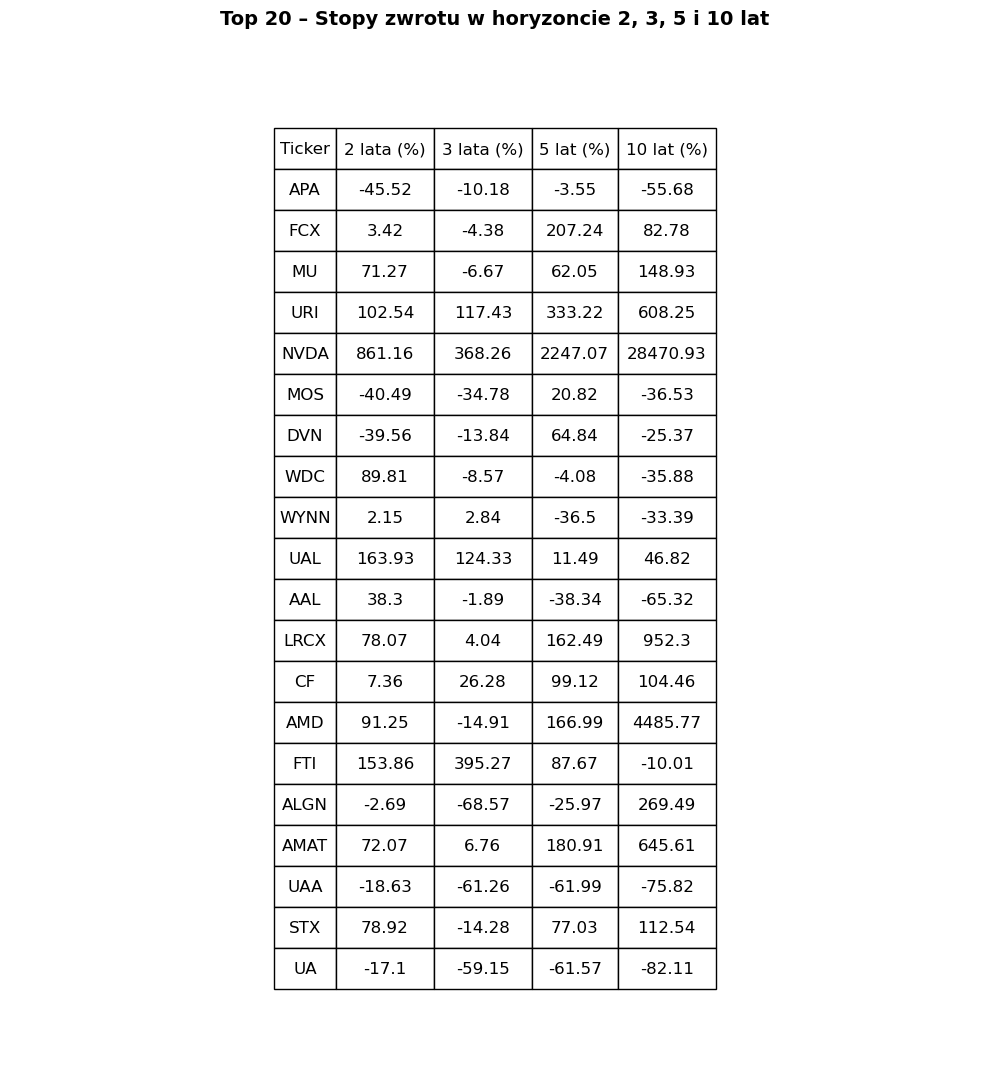

In [93]:
def plot_table_with_title(df, title):
    fig, ax = plt.subplots(figsize=(10, len(df)*0.5 + 1))
    ax.axis('off')
    
    # Tytuł
    plt.title(title, fontsize=14, fontweight='bold', pad=10)
    
    # Tabela
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center'
    )
    
    # Stylizacja tabeli
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    table.scale(1, 2)  # szerokość x wysokość
    
    plt.tight_layout()
    plt.show()

# Przygotowujemy dane Top 20
if 'group' in returns_df.columns:
    top_20_df = returns_df.drop(columns=['group']).copy()
else:
    top_20_df = returns_df.copy()

top_20_df.columns = ["Ticker", "2 lata (%)", "3 lata (%)", "5 lat (%)", "10 lat (%)"]

# Przygotowujemy dane Bottom 20
if 'group' in bottom_returns_df.columns:
    bottom_20_df = bottom_returns_df.drop(columns=['group']).copy()
else:
    bottom_20_df = bottom_returns_df.copy()

bottom_20_df.columns = ["Ticker", "2 lata (%)", "3 lata (%)", "5 lat (%)", "10 lat (%)"]

# Wyświetlamy tabelę Top 20
plot_table_with_title(top_20_df, "Top 20 – Stopy zwrotu w horyzoncie 2, 3, 5 i 10 lat")

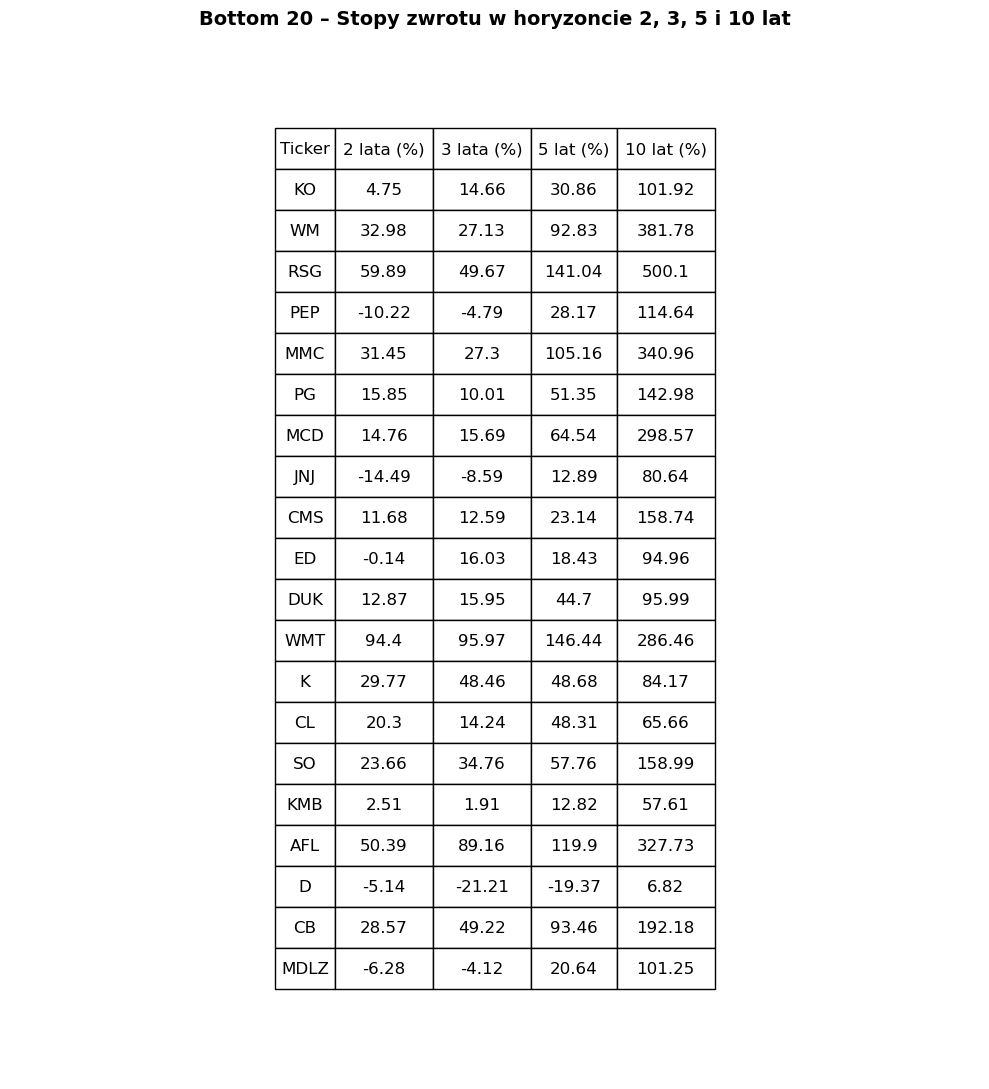

In [95]:
# Wyświetlamy tabelę Bottom 20
plot_table_with_title(bottom_20_df, "Bottom 20 – Stopy zwrotu w horyzoncie 2, 3, 5 i 10 lat")